# Auditory brainstem response in ADHD childern for calsiffication of ADHD from neuro-typical children

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('data_ADHD.csv')
data.head()


,V,A,C,D,E,F,O,class,type
0,6.08,6.85,18.8,24.7,33.1,39.9,45.0,1.0,ADHD
1,6.57,6.44,18.6,23.5,28.0,37.7,47.0,1.0,ADHD
2,6.16,6.67,18.2,28.9,31.5,36.6,47.4,1.0,ADHD
3,6.47,6.86,18.2,22.1,26.2,39.3,48.8,1.0,ADHD
4,6.03,6.92,18.3,17.5,28.2,40.4,47.4,1.0,ADHD


In [24]:
X=data.iloc[:,0:6]
Y=data.iloc[:,-2]

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [26]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# Training SVM model on training set

In [27]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0) # with gausian kernel
classifier.fit(x_train,y_train)

SVC(random_state=0)

In [28]:
y_pred=classifier.predict(x_test)
y_pred.shape

(14,)

confusion metrix:  [[7 2]
 [1 4]]
              precision    recall  f1-score   support

         0.0       0.88      0.78      0.82         9
         1.0       0.67      0.80      0.73         5

    accuracy                           0.79        14
   macro avg       0.77      0.79      0.78        14
weighted avg       0.80      0.79      0.79        14



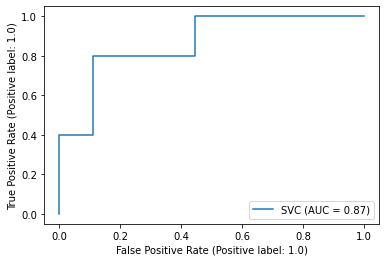

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn import metrics
cm=confusion_matrix(y_test,y_pred)
print('confusion metrix: ',cm)
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

metrics.plot_roc_curve(classifier,x_test,y_test)
plt.show()


# since our dataset is small we can use cross validation methods-lets do 10 fold cross validation

In [30]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(classifier, X,Y,cv=10)
scores


array([0.42857143, 0.57142857, 0.57142857, 0.57142857, 0.57142857,
       0.71428571, 0.5       , 0.5       , 0.5       , 0.66666667])

# The data is more complicated and we need other kernels that can seperate the dataset better.
Here we use wavelet kernels. Morlet wavelet kernel: